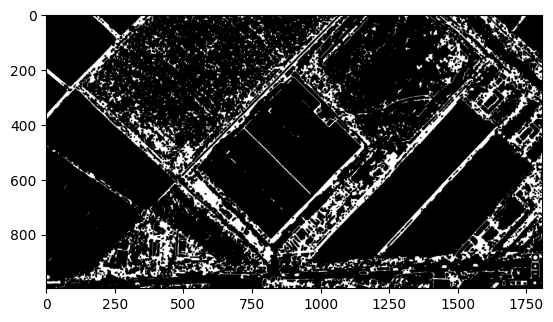

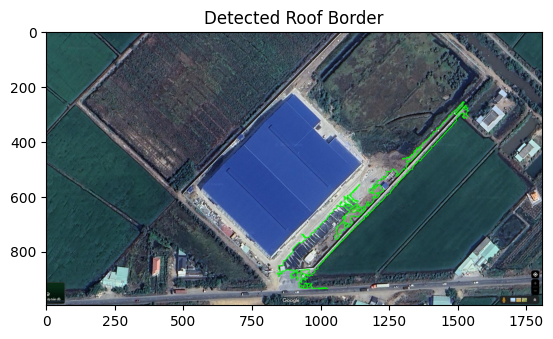

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('IMG/test3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Edge detection
edges = cv2.Canny(gray, 200, 260)


# Morphological operations to clean noise
kernel = np.ones((5,5), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the largest contour (likely the house roof)
contour_img = img.copy()
contours = sorted(contours, key=cv2.contourArea, reverse=True)
cv2.drawContours(contour_img, [contours[0]], -1, (0,255,0), 2)

plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Roof Border")
plt.show()
